In [2]:
#Use Case 1: Data Exploration and Cleaning
import pandas as pd
ds=pd.read_csv("noisy_covid_data.csv")
print(ds)


            Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     NaN    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        NaN  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     NaN    63101.0  2020-03-06
998           India     New York    90941.0   900.0        NaN  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]


In [141]:
ds.head()

,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,NaN,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,NaN,3882.0,2394.0,2021-12-21


In [4]:
ds.tail()

,Country,State,Confirmed,Deaths,Recovered,Date
995,United States,Moscow,60372.0,3497.0,4800.0,2020-11-17
996,India,Maharashtra,NaN,3860.0,3838.0,2022-09-01
997,Germany,California,54863.0,NaN,63101.0,2020-03-06
998,India,New York,90941.0,900.0,NaN,2022-04-22
999,France,Maharashtra,39737.0,2075.0,36782.0,2021-07-10


In [143]:
ds.info

<bound method DataFrame.info of             Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     NaN    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        NaN  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     NaN    63101.0  2020-03-06
998           India     New York    90941.0   900.0        NaN  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]>

In [136]:
ds.dtypes

Country           object
State             object
Confirmed        float64
Deaths           float64
Recovered        float64
Date              object
Fatality_rate    float64
dtype: object

In [144]:
ds.describe()

,Confirmed,Deaths,Recovered
count,900.000000,900.000000,900.000000
mean,56043.782222,2490.523333,35400.577778
std,61621.220858,1429.540547,20600.337195
min,1002.000000,17.000000,536.000000
25%,25720.000000,1243.750000,17531.500000
50%,52682.000000,2524.500000,35093.000000
75%,77178.000000,3787.500000,54226.250000
max,865970.000000,4998.000000,69885.000000


In [24]:
#Handling missing value 
ds[['Confirmed','Deaths','Recovered']]=ds[['Confirmed','Deaths','Recovered']].fillna('0')
ds

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Recovered, Length: 1000, dtype: bool


In [14]:
#Converting colums from object type to numeric 
ds[['Confirmed','Deaths','Recovered']]=ds[['Confirmed','Deaths','Recovered']].apply(pd.to_numeric,errors='coerce')


In [15]:
#Assume any value greater than 50000 is an outlier 
#Replacing an outliner with mean value of Confirmed column
ds['Confirmed']=ds['Confirmed'].where(ds['Confirmed']>50000,ds['Confirmed'].mean())
ds

,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,50439.404,0.0,50392.0,2022-05-07
1,France,New York,50439.404,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,50439.404,4875.0,18420.0,2021-07-20
3,United States,Florida,50439.404,2299.0,17202.0,2022-07-04
4,Russia,Moscow,50439.404,3882.0,2394.0,2021-12-21
...,...,...,...,...,...,...
995,United States,Moscow,60372.000,3497.0,4800.0,2020-11-17
996,India,Maharashtra,50439.404,3860.0,3838.0,2022-09-01
997,Germany,California,54863.000,0.0,63101.0,2020-03-06
998,India,New York,90941.000,900.0,0.0,2022-04-22


In [16]:
#Use Case 2: Country-Level COVID-19 Analysis 
#Group Data by Country: Aggregate data to calculate total confirmed cases, deaths, and recovered cases for each country.
total_confirmed=ds.groupby('Country')['Confirmed'].sum()
total_deaths=ds.groupby('Country')['Deaths'].sum()
total_recovered=ds.groupby('Country')['Recovered'].sum()
print("Total Confirmed Cases in each country:",total_confirmed)
print("Total Death Cases in each country:",total_deaths)
print("Total Recovered Cases in each country:",total_deaths)



Total Confirmed Cases in each country: Country
Brazil            6671148.968
France            6496007.048
Germany           5913785.604
India             8949979.796
Italy             7063179.664
Mexico            7546764.452
Russia            6060912.008
Spain             5660185.140
United Kingdom    6455096.028
United States     5798743.220
Name: Confirmed, dtype: float64
Total Death Cases in each country: Country
Brazil            222424.0
France            223333.0
Germany           210541.0
India             257437.0
Italy             270143.0
Mexico            259871.0
Russia            200076.0
Spain             165317.0
United Kingdom    206574.0
United States     225755.0
Name: Deaths, dtype: float64
Total Recovered Cases in each country: Country
Brazil            222424.0
France            223333.0
Germany           210541.0
India             257437.0
Italy             270143.0
Mexico            259871.0
Russia            200076.0
Spain             165317.0
United Kingdom  

In [17]:
#Rank Countries by Cases: Identify the top 10 countries with the highest number of confirmed cases.
rank_countries_cases=ds.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)
print(rank_countries_cases)
print(ds.columns)


Country
India             8949979.796
Mexico            7546764.452
Italy             7063179.664
Brazil            6671148.968
France            6496007.048
United Kingdom    6455096.028
Russia            6060912.008
Germany           5913785.604
United States     5798743.220
Spain             5660185.140
Name: Confirmed, dtype: float64
Index(['Country', 'State', 'Confirmed', 'Deaths', 'Recovered', 'Date'], dtype='object')


In [18]:
#Calculate Fatality Rate: For each country, calculate the fatality rate (deaths/confirmed cases)
grouped=ds.groupby('Country').agg({'Confirmed':'sum','Deaths':'sum'})
print(grouped)
grouped['Fatality_Rate']=grouped['Deaths']/grouped['Confirmed']
ds=ds.merge(grouped[['Fatality_Rate']],on='Country',how='left')
ds


                  Confirmed    Deaths
Country                              
Brazil          6671148.968  222424.0
France          6496007.048  223333.0
Germany         5913785.604  210541.0
India           8949979.796  257437.0
Italy           7063179.664  270143.0
Mexico          7546764.452  259871.0
Russia          6060912.008  200076.0
Spain           5660185.140  165317.0
United Kingdom  6455096.028  206574.0
United States   5798743.220  225755.0


,Country,State,Confirmed,Deaths,Recovered,Date,Fatality_Rate
0,Russia,Berlin,50439.404,0.0,50392.0,2022-05-07,0.033011
1,France,New York,50439.404,2656.0,51021.0,2022-01-29,0.034380
2,United Kingdom,Karnataka,50439.404,4875.0,18420.0,2021-07-20,0.032002
3,United States,Florida,50439.404,2299.0,17202.0,2022-07-04,0.038932
4,Russia,Moscow,50439.404,3882.0,2394.0,2021-12-21,0.033011
...,...,...,...,...,...,...,...
995,United States,Moscow,60372.000,3497.0,4800.0,2020-11-17,0.038932
996,India,Maharashtra,50439.404,3860.0,3838.0,2022-09-01,0.028764
997,Germany,California,54863.000,0.0,63101.0,2020-03-06,0.035602
998,India,New York,90941.000,900.0,0.0,2022-04-22,0.028764


In [67]:
#Use Case 3: Trend Analysis for Specific Country

 #Filter Data by Country: Extract data for a specific country (e.g., India)
print(ds[ds['Country']=='India'])
#print(ds.loc[ds['Country']=='India'])
#Group by Date: Aggregate data by date to calculate the daily confirmed, deaths, and recovered cases.
date=ds.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
print(date)


    Country        State  Confirmed  Deaths  Recovered       Date  \
29    India        Texas  50439.404  1005.0    11344.0 2021-08-03   
30    India       London  50439.404  1197.0    51955.0 2022-08-27   
55    India     New York  88858.000  1084.0    49563.0 2021-09-28   
60    India       Moscow  51617.000  2643.0        0.0 2022-03-27   
66    India       Berlin  76271.000   510.0    19391.0 2021-02-05   
..      ...          ...        ...     ...        ...        ...   
972   India       Moscow  50439.404  4577.0    53300.0 2020-10-03   
975   India    Karnataka  89743.000     0.0    64815.0 2020-04-24   
986   India       London  75921.000  1990.0    15790.0 2022-09-08   
996   India  Maharashtra  50439.404  3860.0     3838.0 2022-09-01   
998   India     New York  90941.000   900.0        0.0 2022-04-22   

     Fatality_Rate  
29        0.028764  
30        0.028764  
55        0.028764  
60        0.028764  
66        0.028764  
..             ...  
972       0.028764  
975

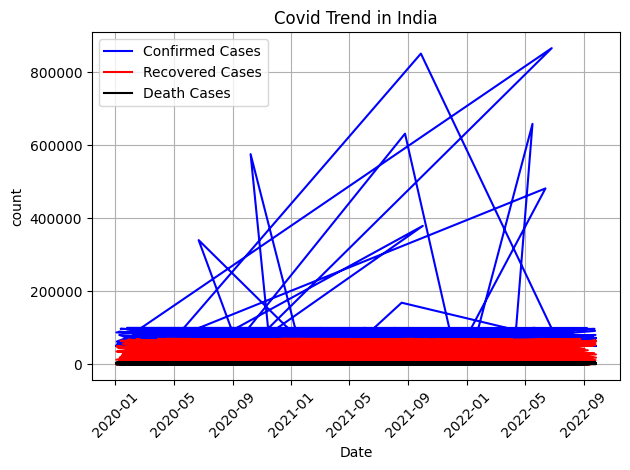

In [68]:
#Visualize Trends: Plot the trend of confirmed cases, deaths, and recoveries over time using a line plot.
#pip install matplotlib
import matplotlib.pyplot as plt
ds['Date']=pd.to_datetime(ds['Date'])
plt.plot(ds['Date'],ds['Confirmed'],label='Confirmed Cases',color='blue')
plt.plot(ds['Date'],ds['Recovered'],label='Recovered Cases',color='red')
plt.plot(ds['Date'],ds['Deaths'],label='Death Cases',color='black')

plt.title('Covid Trend in India')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


             Confirmed  Deaths  Recovered
Date                                     
2020-01-05   50777.000  3964.0        0.0
2020-01-12   97248.000  4425.0    64885.0
2020-01-19       0.000     0.0        0.0
2020-01-26   50395.000   244.0    49616.0
2020-02-02   50439.404  4381.0    45359.0
...                ...     ...        ...
2022-08-28   50439.404  1197.0    51955.0
2022-09-04  180464.808  8133.0    14902.0
2022-09-11   75921.000  1990.0    15790.0
2022-09-18       0.000     0.0        0.0
2022-09-25   75907.000  3775.0     7429.0

[143 rows x 3 columns]
             Confirmed  Deaths  Recovered  7_day_rolling_avg
Date                                                        
2020-01-05   50777.000  3964.0        0.0                NaN
2020-01-12   97248.000  4425.0    64885.0                NaN
2020-01-19       0.000     0.0        0.0                NaN
2020-01-26   50395.000   244.0    49616.0                NaN
2020-02-02   50439.404  4381.0    45359.0                NaN
...

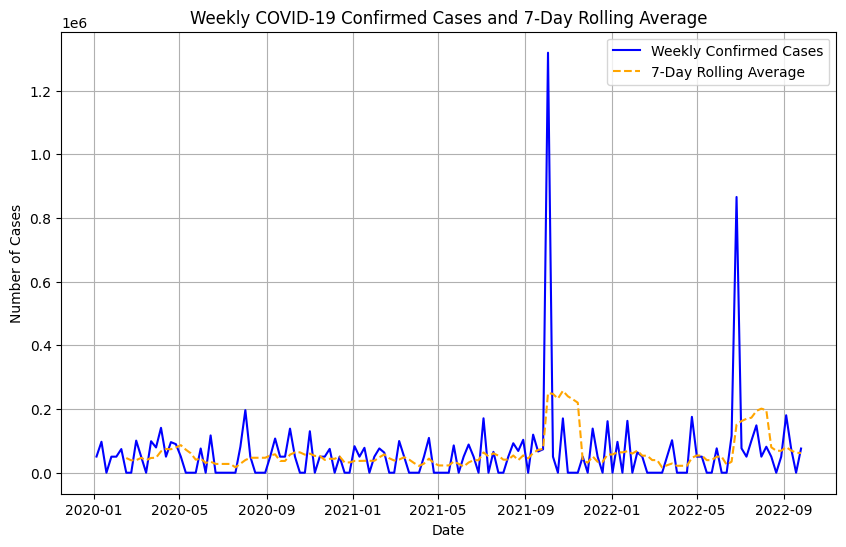

In [104]:
#Use Case 4: Time-Series Resampling and Rolling Averages 
#1. Resample Data: Convert the daily data into weekly aggregated data (sum of cases per week).
Data_india=ds[ds['Country']=='India']
Data_india.loc[:,'Date']=pd.to_datetime(Data_india['Date'])
group_date=Data_india.groupby('Date').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
weekly_data=group_date.resample('W').sum()
print(weekly_data)
weekly_data['7_day_rolling_avg'] = weekly_data['Confirmed'].rolling(window=7).mean()
print(weekly_data)
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Confirmed'], label='Weekly Confirmed Cases', color='blue')
plt.plot(weekly_data.index, weekly_data['7_day_rolling_avg'], label='7-Day Rolling Average', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Weekly COVID-19 Confirmed Cases and 7-Day Rolling Average')
plt.legend()
plt.grid(True)

plt.show()

In [36]:
#Use Case 5: Merging External Data
#1. Merge Population Data: Load external population data and merge it with the COVID-19 dataset.
population_data=pd.read_csv('population_data.csv')
merge_data=pd.merge(population_data,ds,on='Country',how='inner')
#2. Calculate Cases per Capita: Compute confirmed cases per capita for each country.
merge_data['Cases per Capita']=(merge_data['Confirmed']/merge_data['Population'])*100000
print(merge_data)
#3. Rank Countries: Rank countries by confirmed cases per capita.
rank_data=merge_data.sort_values(by='Cases per Capita', ascending=False)
print(rank_data[['Country','Population','Confirmed','Cases per Capita']].head(10))


           Country  Population      State  Confirmed  Deaths  Recovered  \
0    United States   331002651    Florida  50439.404  2299.0    17202.0   
1    United States   331002651     London  50439.404  4489.0    28159.0   
2    United States   331002651      Paris  95244.000  2191.0    33538.0   
3    United States   331002651  Karnataka  76257.000     0.0    18533.0   
4    United States   331002651      Texas  50439.404  2233.0    23957.0   
..             ...         ...        ...        ...     ...        ...   
995         Mexico   128932753   New York  50439.404  4889.0      943.0   
996         Mexico   128932753  Karnataka  50439.404  3176.0    68747.0   
997         Mexico   128932753     Berlin  50439.404  2949.0        0.0   
998         Mexico   128932753     London  50439.404  2306.0    18540.0   
999         Mexico   128932753     London  96880.000  4929.0     3839.0   

           Date  Fatality_Rate  Cases per Capita  
0    2022-07-04       0.038932         15.238369

In [217]:
#Use Case 6: Creating a Final Report
#Tasks:
#1. Summarize Key Metrics: For each country, calculate total confirmed cases, deaths, recoveries, and fatality rate.
#2. Export to CSV: Save the final summarized data to a CSV file for further analysis 

data=ds.groupby('Country').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
data['Fatality_rate']=data['Deaths']/data['Confirmed']
print(data)
data.to_csv("Susmitha_hashInclude.csv",index=False)

                  Confirmed    Deaths  Recovered  Fatality_rate
Country                                                        
Brazil          6671148.968  222424.0  3367134.0       0.033341
France          6496007.048  223333.0  2907060.0       0.034380
Germany         5913785.604  210541.0  3172883.0       0.035602
India           8949979.796  257437.0  3514596.0       0.028764
Italy           7063179.664  270143.0  3055729.0       0.038247
Mexico          7546764.452  259871.0  4112546.0       0.034435
Russia          6060912.008  200076.0  3267724.0       0.033011
Spain           5660185.140  165317.0  2419315.0       0.029207
United Kingdom  6455096.028  206574.0  3124525.0       0.032002
United States   5798743.220  225755.0  2919008.0       0.038932
